In [1]:
%matplotlib inline
import sys
sys.path.append("/home/diego/Dropbox/hold_noise/iclamp-glm/")

import matplotlib.pyplot as plt
import numpy as np

from icglm.models.glm import GLM
from icglm.kernels import KernelRect
from icglm.processes import AutoCorr, OUProcess

from scipy.linalg import solveh_banded

%load_ext autoreload
%autoreload 2

Starting gradient ascent... 

 Iteration 12 of 20 | Elapsed time: 8.83 seconds | log_prior=-52.59 | log_posterior=-374.51
 
 Iteration 12 of 20 | Converged | Elapsed time: 0.1472 minutes | Log posterior is monotonic 



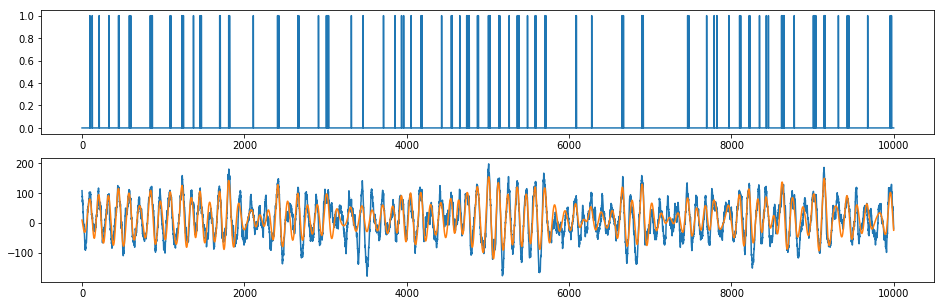

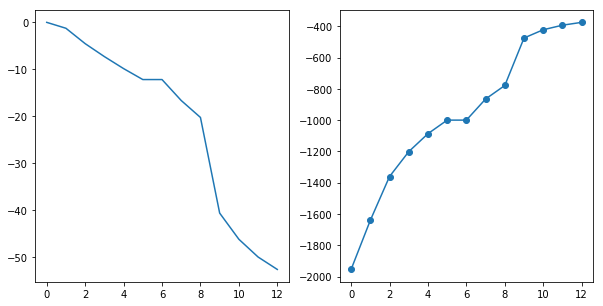

In [8]:
def autocorr(t, f, tau):
    return np.cos(2 * np.pi * f * t) * np.exp(-np.abs(t / tau))

t = np.arange(0, 10000, 1)
f, tau = 8 / 1000, 150
mu, sd = 10, 60
npp = AutoCorr(mu=mu, sd=sd, autocorr_fun=autocorr, pars=dict(f=f, tau=tau))
npp.set_prior_on_t(t, t_max_band_cov=tau * 10, eps_max_band_inv_cov=1e-6, inv_cov=True, cholesky=True)

stim_true = npp.sample(t, seed=1)
kappa = KernelRect.exponential(tf=240, dt=8, tau=40, A=1e-2)
eta = KernelRect.exponential(tf=450, dt=25, tau=75, A=7)
u0 = 16
glm_true = GLM(u0=u0, kappa=kappa, eta=eta)

np.random.seed(0)
v, r, mask_spk_true = glm_true.sample(t, stim_true)

fig, (ax1, ax2) = plt.subplots(figsize=(16, 5), nrows=2)
ax1.plot(t, mask_spk_true)
ax2.plot(t, stim_true)

newton_kwargs = dict(max_iterations=20, stop_cond=5e-4, learning_rate=5e-2, initial_learning_rate=5e-3, warm_up_iterations=5)

stim0 = np.zeros(len(t)) + mu
stim_dec, optimizer = glm_true.decode(t, mask_spk_true, stim0=stim0, prior=npp, newton_kwargs=newton_kwargs, verbose=True)
ax2.plot(t, stim_dec)

fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2)
ax1.plot(optimizer.log_prior_iterations)
ax2.plot(optimizer.log_posterior_iterations, '-o')

In [1]:
def autocorr(t, tau):
    return np.exp(-np.abs(t / tau))

t = np.arange(0, 2000, 1)
tau = 10
mu, sd = 30, 30
ou = GeneralCov(mu=mu, sd=sd, autocorr_fun=autocorr, pars=dict(tau=tau))
ou.set_cov(t, t_max_band_cov=tau * 20)

stim = ou.sample(seed=1)
kappa = KernelRect.exponential(tf=240, dt=8, tau=40, A=1e-2)
eta = KernelRect.exponential(tf=450, dt=25, tau=75, A=7)
u0 = 16
glm_true = GLM(u0=u0, kappa=kappa, eta=eta)
np.random.seed(0)
r, kappa_conv, eta_conv, mask_spk_true = glm_true.simulate(t, stim)

r, kappa_conv, eta_conv, mask_spk_true = glm_true.simulate(t, stim)
fig, (ax1, ax2) = plt.subplots(figsize=(16, 5), nrows=2)
ax1.plot(t, mask_spk_true)
ax2.plot(t, stim)

newton_kwargs = dict(max_iterations=100, stop_cond=1e-6, learning_rate=1e-1, initial_learning_rate=1e-3, warm_up_iterations=5)

stim_true = stim.copy()

stim0 = np.zeros(len(t)) + mu
stim_dec, optimizer = glm_true.decode(t, mask_spk_true, stim0=stim0, mu_I=0, sd_I=1, Ih=mu, prior=ou, newton_kwargs=newton_kwargs, verbose=True)

npp2 = OUProcess(mu=mu, sd=sd, tau=tau)
stim_dec2, optimizer2 = glm_true.decode(t, mask_spk_true, stim0=stim0, mu_I=0, sd_I=1, Ih=mu, prior=npp2, newton_kwargs=newton_kwargs, verbose=True)
# fig, ax = plt.subplots(figsize=(16, 5))
ax2.plot(t, stim_dec)
ax2.plot(t, stim_dec2)
# ax2.plot(t, sd * np.cos(stim_dec) + mu)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(10, 5), nrows=2, ncols=2)
ax1.plot(optimizer.log_prior_iterations)
ax2.plot(optimizer.log_posterior_iterations, '-o')
ax3.plot(optimizer2.log_prior_iterations)
ax4.plot(optimizer2.log_posterior_iterations, '-o')

NameError: name 'np' is not defined

In [41]:
1 / f

125.0